In [1]:
## In-Class Assignment 1

import boto3
import pandas as pd

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## 1) Reading the csv file
heart = pd.read_csv(file_content_stream)

heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
## 2) Removing observations with missing values.

heart = heart.dropna()

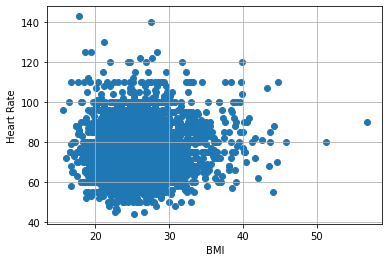

In [8]:
## 3) Creating a scatter plot of BMI and heartRate.

import matplotlib.pyplot as plt

plt.scatter(heart['BMI'], heart['heartRate'])
plt.xlabel('BMI')
plt.ylabel('Heart Rate')
plt.grid()
plt.show()

## From the scatterplot, we can see that there is no obvious relationship between BMI and heartRate (No specific pattern in the plot).

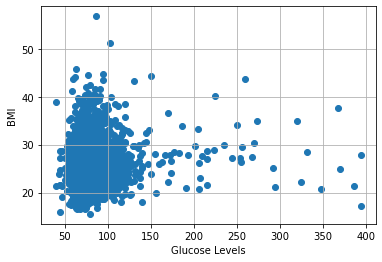

In [11]:
## 4) Creating a scatter plot of glucose and BMI.

plt.scatter(heart['glucose'], heart['BMI'])
plt.xlabel('Glucose Levels')
plt.ylabel('BMI')
plt.grid()
plt.show()

## There is not a clear relationship between glucose and BMI

In [13]:
## 5) Building a logistic regression model in which: age, currentSmoker, totChol, BMI, and heartRate are the input variables, 
## and TenYearCHD is the target variable.

from sklearn.linear_model import LogisticRegression

## Defining the input and output variables
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

logit_md = LogisticRegression().fit(X, Y)

## 6) Using the model from part 5, predict the likelihood of risk of coronary disease of a patient with the following characteristics: 
## age = 50, currentSmoker = 1, totChol = 250, BMI = 27, and heartRate = 85.

## Characteristics of the new patient
new_patient = [[50, 1, 250, 27, 85]]

logit_md.predict_proba(new_patient)

## 81.9% represents the liklihood of the new patient not TenYearCHD.
## 18.1% represents the liklihood that the new patient does.

array([[0.8193106, 0.1806894]])